<a href="https://colab.research.google.com/github/samuel-zahner/Intro-to-AI/blob/main/FireMaze_stage3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#%matplotlib inlin
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
import random
import heapq


## Code for Plotting

In [ ]:
#** code for plotting **

step_size = 10
start_color = np.array([0,0,255]) #blue
goal_color = np.array([0,255,0]) #green
obstacle_color = np.array([0,0,0])#black
neighbor_color = np.array([220,220,220])#gray
fringe_color = np.array([128,128,128])#yellow
fire_color = np.array([255,0,0])#red
node_color = np.array([255,165,0])#orange

#plotting obstacles in maze given a set
def plot_obstacle(obstacle_set, dim):
    fig = plt.figure()

    prob_map = np.zeros((step_size*dim,step_size*dim,3)).astype(int) + 255
    # add grid
    prob_map[step_size-1::step_size,:,:] = 0
    prob_map[:,step_size-1::step_size,:] = 0

    
    #setting specific grid boxes to their color
    prob_map[0:step_size-1,:step_size-1] = start_color
    prob_map[step_size*(dim-1):step_size*(dim-1)+step_size-1,step_size*(dim-1):step_size*(dim-1)+step_size-1] = goal_color
    plt.xticks([], [])
    plt.yticks([], [])
    
    for i in range(dim):
        for j in range(dim):
            if (i,j) in obstacle_set:
                prob_map[step_size*i:step_size*i + step_size-1, step_size*j:step_size*j + step_size-1] = obstacle_color
    plt.imshow(prob_map)
    
#setting the color for a specific node
def node_plot(prob_map, node, color, alpha=1.0):
    prob_map[node[0]*step_size:node[0]*step_size+step_size-1,node[1]*step_size:node[1]*step_size+step_size-1] = color*alpha
    

#plot the given path from start to goal
def path_plot(path, dim, obstacle_set):
    # plot given the info as listed 
    prob_map = np.zeros((step_size*dim,step_size*dim,3)).astype(int) + 255
    # add grid
    prob_map[step_size-1::step_size,:,:] = 0
    prob_map[:,step_size-1::step_size,:] = 0
    
    for i in range(dim):
        for j in range(dim):
            if (i,j) in obstacle_set:
                prob_map[step_size*i:step_size*i + step_size-1, step_size*j:step_size*j + step_size-1] = obstacle_color
    
    #plot path nodes through node_plot()
    for i in range(len(path)):
        node = path[i]
        node_plot(prob_map, node, node_color, alpha=i/len(path)+1.0)

    prob_map[0:step_size-1,:step_size-1] = start_color
    prob_map[step_size*(dim-1):step_size*(dim-1)+step_size-1,step_size*(dim-1):step_size*(dim-1)+step_size-1] = goal_color


    plt.xticks([], [])
    plt.yticks([], [])

    img = plt.imshow(prob_map)
    return img

## DFS

In [ ]:
#Depth first search algorithm
#returns boolean of whether there is a path 
def dfs_search(dim, obstacle_set):
    transitions = [(0,-1),(-1,0),(0,1),(1,0)]
    start = (0,0)
    goal = (dim-1, dim-1)
    explored_spaces = set([])
    fringe = [(start, [])] #fringe keeps track of the path taken to get to each node
    win_flag = False

    
    while len(fringe) > 0:
        node, path = fringe.pop(-1)#pop most recently added node
    
        #do not append to path if node is in explored_spaces or obstacle_set
        if node in explored_spaces:
            continue
        if node in obstacle_set:
            continue
        
        #append node to path
        path.append(node)
    
        if node[0] == goal[0] and node[1] == goal[1]:
            #print("You have found the goal")
            win_flag = True
            break
        
        #expand all of the neighbors of current node and add to fringe
        for i in range(len(transitions)):
            dy, dx = transitions[i]
        
            x = node[0] + dx
            y = node[1] + dy
            
            #check if node is valid
            if x < 0 or y < 0 or x > dim-1 or y > dim-1:
                continue
            if (x,y) in explored_spaces:
                continue
            if (x,y) in obstacle_set:
                continue
            if (x,y) not in fringe:
                fringe.append(((x,y), path[:]))
    
        explored_spaces.add(node)
        
    if win_flag == False:
        #print("There is no path from start to goal")
        return False
    
    #print("Path length: " + str(len(path)-1))
    #path_plot(path, dim, fire_set)
    return True

## BFS

In [ ]:
#Breadth First Search algorithm
#Returns boolean of whether there is a path and the number of nodes it explored
def bfs_search(dim, obstacle_set):
    transitions = [(0,-1),(-1,0),(0,1),(1,0)]
    start = (0,0)
    goal = (dim-1, dim-1)
    explored_spaces = set([])
    fringe = [(start, [])]
    win_flag = False
    num_explored = 0


    while len(fringe) > 0:
        node, shortest_path = fringe.pop(0)#pop the first element added to the fringe
        
        #check if node is valid
        if node in explored_spaces:
            continue
        if node in obstacle_set:
            continue
            
        #append node to path
        shortest_path.append(node)
        
        #increase counter to keep track of total nodes explored
        num_explored += 1
        if node[0] == goal[0] and node[1] == goal[1]:
            #print("You have found the goal")
            win_flag = True
            break

        #expand neighbors and add to fringe
        for i in range(len(transitions)):
            dy, dx = transitions[i]
        
            x = node[0] + dx
            y = node[1] + dy
        
            #check if neighbor is valid
            if x < 0 or y < 0 or x > dim-1 or y > dim-1:
                continue
            if (x,y) in explored_spaces:
                continue
            if (x,y) in obstacle_set:
                continue
            if (x,y) not in fringe:
                fringe.append(((x,y), shortest_path[:]))
       
    
        explored_spaces.add(node)
        
    if win_flag == False:
        #print("There is no path from start to goal")
        return (False, num_explored)
    
    
    #print("Shortest path: " + str(len(shortest_path)-1))
    #path_plot(shortest_path, dim, fire_set)
    return (True, num_explored)

In [ ]:
#helper method to calculate euclidean heuristic
def euclidean(start,end):
    distance = ((end[0]-start[0])**2 + (end[1]-start[1])**2)**0.5
    return distance

## A*

In [ ]:
#A* search
#returns boolean if there is a path and number of nodes it explored
def A_search(dim, obstacle_set):
    transitions = [(0,-1),(-1,0),(0,1),(1,0)]
    start = (0,0)
    goal = (dim-1, dim-1)
    explored_spaces = set([])
    #fringe is a heap, sorted by the least heuristic
    #heuristic = distance traveled so far + euclidean estimate
    fringe = [(euclidean(start,goal), 0, start, [])]
    heapq.heapify(fringe)
    win_flag = False
    num_explored = 0


    while len(fringe) > 0:
        #print(fringe)
        heuristic, distance, node, path = heapq.heappop(fringe)#pop the minimum value from the fringe
        
        #check if node is valid
        if node in explored_spaces:
            continue
        if node in obstacle_set:
            continue
            
        path.append(node)#append to path 
        
        num_explored += 1
        if node[0] == goal[0] and node[1] == goal[1]:
            #print("You have found the goal")
            win_flag = True
            break
        
        #for each new node popped, increase the distance traveled by 1
        distance += 1
        #expand neighbors and add to fringe
        for i in range(len(transitions)):
            dy, dx = transitions[i]
        
            x = node[0] + dx
            y = node[1] + dy
            
            #check if valid
            if x < 0 or y < 0 or x > dim-1 or y > dim-1:
                continue
            if (x,y) in explored_spaces:
                continue
            if (x,y) in obstacle_set:
                continue
            if (x,y) not in fringe:
                #heappush pushes to the fringe while keeping the heap intact
                heapq.heappush(fringe, (distance + euclidean((x,y),goal), distance, (x,y), path[:]))
       
        explored_spaces.add(node)
        
    if win_flag == False:
        #print("There is no path from start to goal")
        return (False, num_explored)
    
    
    #print("A* path: " + str(len(path)-1))
    #path_plot(path, dim, fire_set)
    return (True, num_explored)

## Plot Obstacle Maze

Enter dimension of maze: 200
Enter probability of obstacles: .3


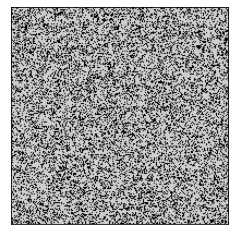

In [ ]:
#take input from user
while True:
    try:
        dim = int(input("Enter dimension of maze: "))
        if dim < 3:
            raise ValueError #this will send it to the print message and back to the input option
        break
    except ValueError:
        print("Invalid integer. Dimension must be at least 3.")

while True:
    try:
        p = float(input("Enter probability of obstacles: "))
        if p < 0 or p > 1:
            raise ValueError #this will send it to the print message and back to the input option
        break
    except ValueError:
        print("Invalid integer. Probability must be in the range (0,1).")



#print(dim)
#print(p)

#add to obstacle set
obstacle_set = set([])
for i in range(dim):
    for j in range(dim):
        if i == 0 and j == 0 or i == dim-1 and j == dim-1:
            continue
        if random.uniform(0,1) < p:
            obstacle_set.add((i,j))›
            
plot_obstacle(obstacle_set, dim)



In [ ]:
#DFS
dfs_search(dim, fire_set)

True

In [ ]:
#BFS
print(bfs_search(dim, fire_set))

(True, 164)


In [ ]:
#A*
print(A_search(dim, fire_set))

(True, 132)


## DFS Probability Density Chart

Text(0.5, 0, 'obstacle density p')

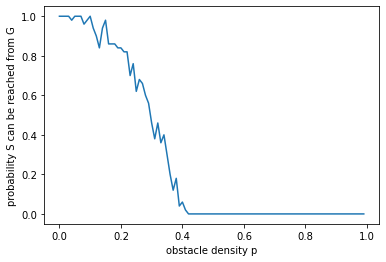

In [ ]:
#Probability Density Chart for DFS
success = 0
probabilities = []
success_percentage = []
dim = 80 #max dimension set to 80 X 80
for p in np.arange(0,1,0.01):
  success = 0
  #get 50 examples for each value of p
  for count in range(50):
    obstacle_set = set([])
    #get new obstacle_set
    for i in range(dim):
        for j in range(dim):
            if i == 0 and j == 0 or i == dim-1 and j == dim-1:
                continue
            if random.uniform(0,1) < p:
                obstacle_set.add((i,j))
    #determine if success or not
    if dfs_search(dim, obstacle_set) == True:
      success += 1
  probabilities.append(p)  
  success_percentage.append(success/50)

#plot results
plt.plot(probabilities, success_percentage)
plt.ylabel("probability S can be reached from G")
plt.xlabel("obstacle density p")


## A* and BFS number of nodes explored chart

Text(0.5, 0, 'obstacle density p')

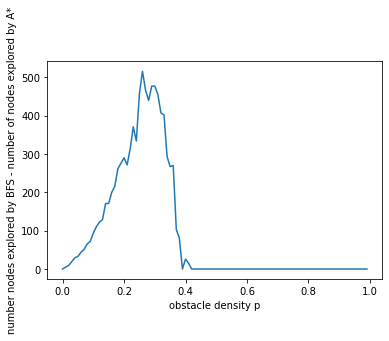

In [ ]:
#A* and BFS chart

counter = 0
probabilities = []
explored_spaces = []
dim = 80 #max dimension set to 80 X 80
for p in np.arange(0,1,0.01):
  counter = 0
  #50 examples for each value of p
  for count in range(50):
    obstacle_set = set([])
    #get new obstacles
    for i in range(dim):
        for j in range(dim):
            if i == 0 and j == 0 or i == dim-1 and j == dim-1:
                continue
            if random.uniform(0,1) < p:
                obstacle_set.add((i,j))
    #subtract BFS - A* for number of nodes explored            
    counter += (int(bfs_search(dim, obstacle_set)[1]) - int(A_search(dim, obstacle_set)[1]))
            
    #print(bfs_search(dim, obstacle_set)[1])
    #print(A_search(dim, obstacle_set)[1])
    #print(counter)
      
  probabilities.append(p)  
  explored_spaces.append(counter/50)

#plot results
plt.plot(probabilities, explored_spaces)
plt.ylabel("number nodes explored by BFS - number of nodes explored by A*")
plt.xlabel("obstacle density p")

## Advancing fire by flammability

In [ ]:
#Add Fire to maze
def advance_fire_one_step(obstacle_set, fire_set,dim,q):
    for i in range(dim):
        for j in range(dim):
            node = (i,j)
            if node not in obstacle_set and node not in fire_set:
                count = 0
                if (node[0]+1,node[1]) in fire_set and node[0]+1 < dim:
                    count += 1
                if (node[0]-1,node[1]) in fire_set and node[0]+1 > -1:
                    count += 1
                if (node[0],node[1]+1) in fire_set and node[1]+1 < dim:
                    count += 1
                if (node[0],node[1]-1) in fire_set and node[1]+1 > -1:
                    count += 1
                prob = 1 - (1-q)**count
                if random.uniform(0,1) <= prob:
                    fire_set.add((i,j)) #append node to fire_set
    return fire_set

In [ ]:
#plot path with fire and obstacles
def path_fire_plot(path, dim, obstacle_set, fire_set):
    # plot given the info as listed 
    #fig = plt.figure()
    prob_map = np.zeros((step_size*dim,step_size*dim,3)).astype(int) + 255
    # add grid
    prob_map[step_size-1::step_size,:,:] = 0
    prob_map[:,step_size-1::step_size,:] = 0
    
    for i in range(dim):
        for j in range(dim):
            if (i,j) in obstacle_set:
                prob_map[step_size*i:step_size*i + step_size-1, step_size*j:step_size*j + step_size-1] = obstacle_color
    for i in range(dim):
        for j in range(dim):
            if (i,j) in fire_set:
                prob_map[step_size*i:step_size*i + step_size-1, step_size*j:step_size*j + step_size-1] = fire_color
    for i in range(len(path)):
        node = path[i]
        node_plot(prob_map, node, node_color, alpha=i/len(path)+1.0)

    prob_map[0:step_size-1,:step_size-1] = start_color
    prob_map[step_size*(dim-1):step_size*(dim-1)+step_size-1,step_size*(dim-1):step_size*(dim-1)+step_size-1] = goal_color


    plt.xticks([], [])
    plt.yticks([], [])

    img = plt.imshow(prob_map)
    return img

In [ ]:
#plot the where the current node is with the obstacles and current state of fire
def plot_obstacles_fire(obstacle_set, fire_set, dim, current_node):
    fig = plt.figure()

    prob_map = np.zeros((step_size*dim,step_size*dim,3)).astype(int) + 255
    # add grid
    prob_map[step_size-1::step_size,:,:] = 0
    prob_map[:,step_size-1::step_size,:] = 0


    prob_map[0:step_size-1,:step_size-1] = start_color
    prob_map[step_size*(dim-1):step_size*(dim-1)+step_size-1,step_size*(dim-1):step_size*(dim-1)+step_size-1] = goal_color
    plt.xticks([], [])
    plt.yticks([], [])
    
    for i in range(dim):
        for j in range(dim):
            if (i,j) in obstacle_set:
                prob_map[step_size*i:step_size*i + step_size-1, step_size*j:step_size*j + step_size-1] = obstacle_color
    for i in range(dim):
        for j in range(dim):
            if (i,j) in fire_set:
                prob_map[step_size*i:step_size*i + step_size-1, step_size*j:step_size*j + step_size-1] = fire_color
    node_plot(prob_map, current_node, node_color, alpha=1.0)
    plt.imshow(prob_map)

## STAGE 1 (plan from the start)

In [ ]:
#STAGE 1
#this algorithm is A* 
#returns path from start to goal
def plan(start, goal, obstacle_set, fire_set):
    transitions = [(0,-1),(-1,0),(0,1),(1,0)]
    explored_spaces = set([])
     #fringe is a heap, sorted by the least heuristic
    #heuristic = distance traveled so far + euclidean estimate
    fringe = [(euclidean(start,goal), 0, start, [])]
    heapq.heapify(fringe)
    win_flag = False


    while len(fringe) > 0:
        #print(fringe)
        heuristic, distance, node, path = heapq.heappop(fringe)#pops the minimum element
        
        #check if node is valid
        if node in explored_spaces:
            continue
        if node in obstacle_set:
            continue
        if node in fire_set:
            continue
            
        path.append(node)#append node to path
        if node[0] == goal[0] and node[1] == goal[1]:
            #print("You have found the goal")
            win_flag = True
            break

        #for each new node popped, increase the distance traveled by 1
        distance += 1
        
        #expand neighbors and add to fringe
        for i in range(len(transitions)):
            dy, dx = transitions[i]
        
            x = node[0] + dx
            y = node[1] + dy
        
            #check if valid
            if x < 0 or y < 0 or x > dim-1 or y > dim-1:
                continue
            if (x,y) in explored_spaces:
                continue
            if (x,y) in obstacle_set:
                continue
            if (x,y) in fire_set:
                continue
            if (x,y) not in fringe:
                #heappush pushes to the fringe while keeping the heap intact
                heapq.heappush(fringe, (distance + euclidean((x,y),goal), distance, (x,y), path[:]))
       
        explored_spaces.add(node)
        
    if win_flag == False:
        print("There is no path from start to goal")
        return path
    
    
    #print("A* path: " + str(len(path)-1))
    #path_plot(path, dim, obstacle_set)
    return path
    

In [ ]:
#steps through the planned path 
#advances the fire each step
#prints the result
def execute_plan(start, goal, obstacle_set, fire_set, path, dim):
    for i in range(len(path)):
        fire_set = advance_fire_one_step(obstacle_set, fire_set, dim, q=0.1)#advances the fire
        node = path[i]
        #check if current node is on fire
        if node in fire_set:
            print("Dead!")
            return
        plot_obstacles_fire(obstacle_set, fire_set, dim, node)
    print("You won!")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


You have found the goal


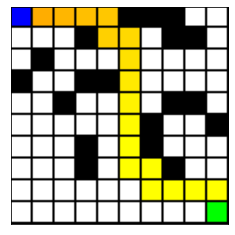

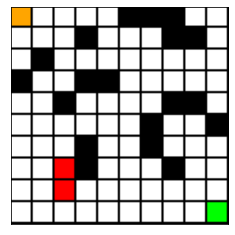

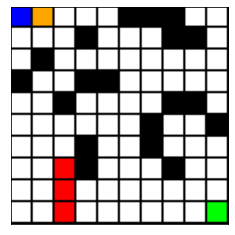

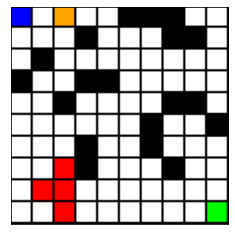

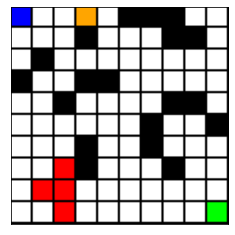

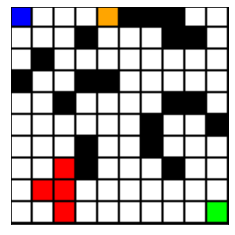

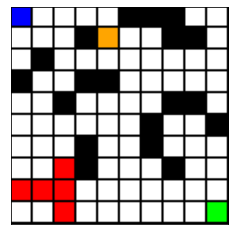

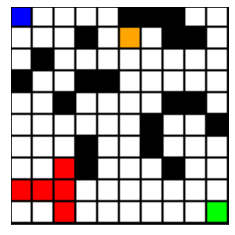

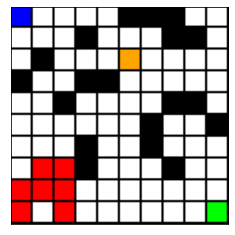

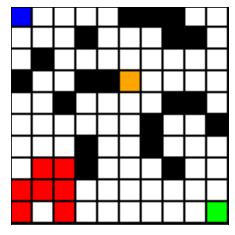

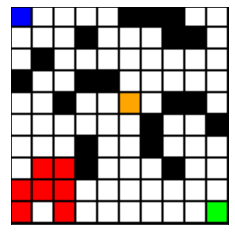

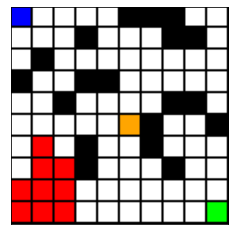

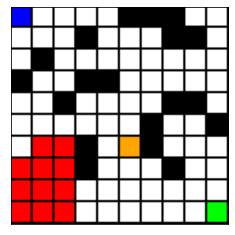

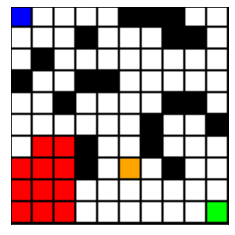

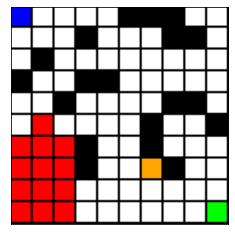

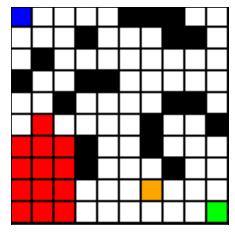

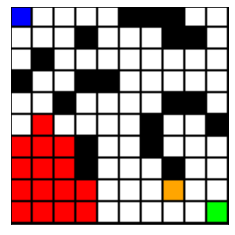

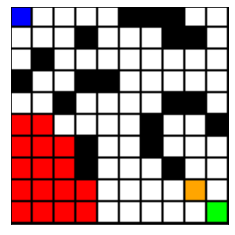

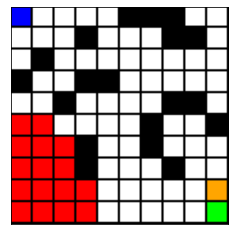

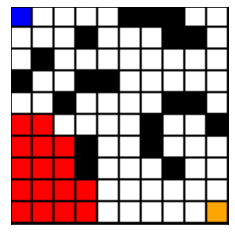

In [ ]:
start = (0,0)
goal = (dim-1, dim-1)
fire_set = set([])
fire_set.add((7,2))

planned_path = plan(start, goal, obstacle_set, fire_set)
execute_plan(start, goal, obstacle_set, fire_set, planned_path, dim)

## STAGE 2 (dynamic planning)

In [ ]:
#executes given path
#plans a new path after each step - taking into account how the fire spread
#advances fire after each step
def execute_each_step(start, goal, obstacle_set, fire_set, path, dim):
    dead = False
    node = start
    while not dead:
        if node == goal:
            print("You win!")
            break
        node = path[1]
        fire_set = advance_fire_one_step(obstacle_set, fire_set, dim, q=0.1)#advance fire 
        #set new start as path[1] and plan again
        path = plan(path[1], goal, obstacle_set, fire_set)
        
        #check if node is on fire
        if node in fire_set:
            print("Dead!")
            dead = True
            break
        plot_obstacles_fire(obstacle_set, fire_set, dim, node)

You win!


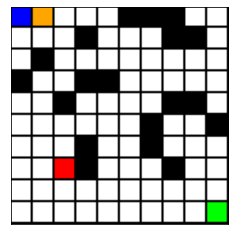

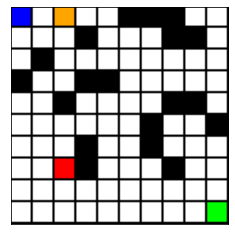

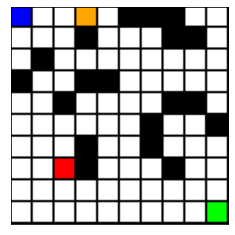

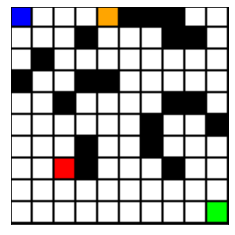

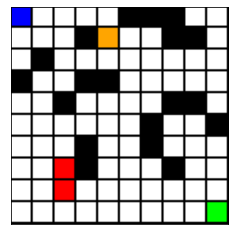

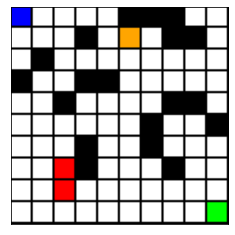

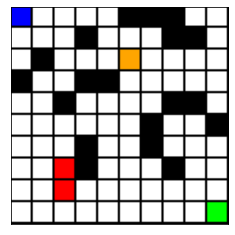

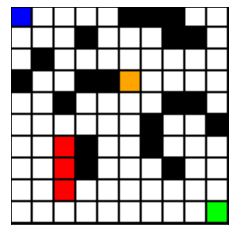

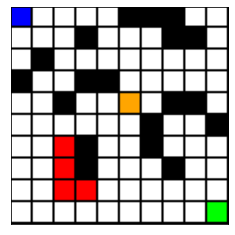

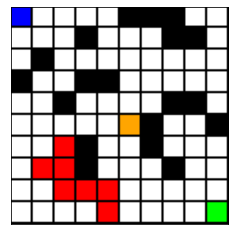

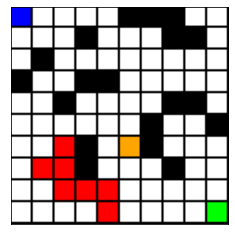

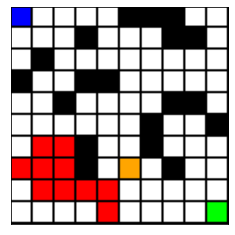

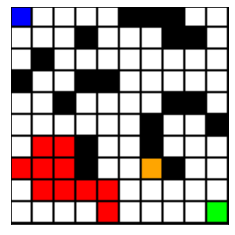

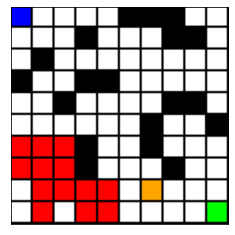

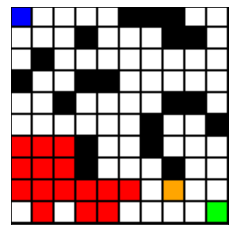

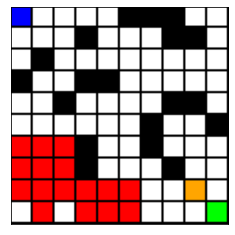

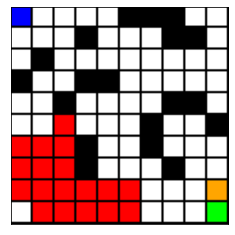

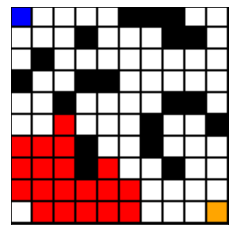

In [ ]:
fire_set_two = set([])
fire_set_two.add((7,2))

starting_path = plan(start, goal, obstacle_set, fire_set_two)
execute_each_step(start, goal, obstacle_set, fire_set_two, starting_path, dim)


## STAGE 3 (our algorithm)

What do I wanna do:

- Do BFS
- Then, calculate euclidean distance per step from fire in every node of the path
- If distance = 2, then recalculate new path avoiding the fire (make sure distance > 2)

In [ ]:
#helper method to calculate euclidean distance loop heuristic
#this will allow us to find how close the fire is to the node in question
def euclidean_loops(node,fire_set):
    shortest_distance = 100
    for i in fire_set:
      distance = ((i[0]-node[0])**2 + (i[1]-node[1])**2)**0.5
      if distance < shortest_distance:
        shortest_distance = distance
    return shortest_distance

In [ ]:
def plan_stage3(start, goal, obstacle_set, fire_set):
    transitions = [(0,-1),(-1,0),(0,1),(1,0)]
    explored_spaces = set([])
     #fringe is a heap, sorted by the least heuristic
    #heuristic = distance traveled so far + euclidean estimate
    fringe = [(euclidean(start,goal), 0, start, [])]
    heapq.heapify(fringe)
    win_flag = False

    while len(fringe) > 0:
        #print(fringe)
        heuristic, distance, node, path = heapq.heappop(fringe)#pops the minimum element
        
        #check if node is valid
        if node in explored_spaces:
            continue
        if node in obstacle_set:
            continue
        if node in fire_set:
            continue
        #makes path around fire by making sure the node is not within 2 units of a node on fire
        if euclidean_loop(node,fire_set) < 2:
            continue 
        path.append(node)#append node to path
        if node[0] == goal[0] and node[1] == goal[1]:
            #print("You have found the goal")
            win_flag = True
            break

        #for each new node popped, increase the distance traveled by 1
        distance += 1
        
        #expand neighbors and add to fringe
        for i in range(len(transitions)):
            dy, dx = transitions[i]
        
            x = node[0] + dx
            y = node[1] + dy
        
            #check if valid
            if x < 0 or y < 0 or x > dim-1 or y > dim-1:
                continue
            if (x,y) in explored_spaces:
                continue
            if (x,y) in obstacle_set:
                continue
            if (x,y) in fire_set:
                continue
            if (x,y) not in fringe:
                #heappush pushes to the fringe while keeping the heap intact
                heapq.heappush(fringe, (distance + euclidean((x,y),goal), distance, (x,y), path[:]))
       
        explored_spaces.add(node)
        
    if win_flag == False:
        print("There is no path from start to goal")
        return path
    
    return path

In [ ]:
#this uses A* as well as checks distance of nodes in the path from the fire per step to avoid the fire
#the goal is to not die rather than get out with the fastest time
def execute_each_step_distance(start, goal, obstacle_set, fire_set, path, dim):
    dead = False
    node = start
    while not dead:
        if node == goal:
            print("You win!")
            break
        node = path[1]
        fire_set = advance_fire_one_step(obstacle_set, fire_set, dim, q=0.1)#advance fire 
        #set new start as path[1] and plan again if any node in path < 2 distance from any fire
        for i in path:
            if euclidean_loop(i,fire_set) < 2:
              path = plan_stage3(path[1], goal, obstacle_set, fire_set)
        
        #check if node is on fire
        if node in fire_set:
            print("Dead!")
            dead = True
            break
        plot_obstacles_fire(obstacle_set, fire_set, dim, node)